[*********************100%%**********************]  1 of 1 completed
C:\Users\attar\AppData\Local\Temp\ipykernel_7444\3116426643.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction'] = data['Close'].shift(-1)  # Shift 'Close' price by one day to create labels


Mean Squared Error: 7.715223441812917


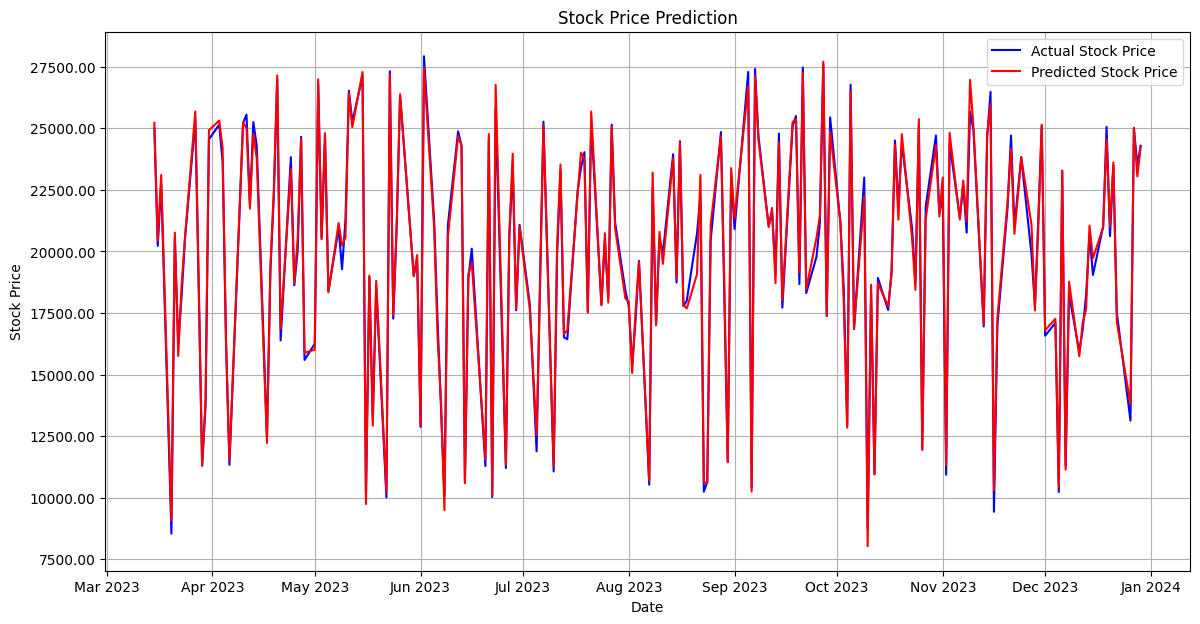

In [36]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Data Collection
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Step 2: Data Preprocessing
def preprocess_data(data):
    data = data[['Close']]  # Using the 'Close' price for prediction
    data['Prediction'] = data['Close'].shift(-1)  # Shift 'Close' price by one day to create labels
    return data

# Step 3: Model Selection and Training
def train_model(data):
    data = data.dropna()  # Drop rows with NaN values
    
    # Feature set (X) and target variable (y)
    X = np.array(data.drop(['Prediction'], axis=1))
    y = np.array(data['Prediction'])
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Scale the feature data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    return model, X_test_scaled, y_test, scaler

# Step 4: Prediction and Evaluation
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return predictions, mse

# Step 5: Plotting Results
def plot_results(y_test, predictions, original_data, scaler):
    # Rescale predictions and y_test back to the original scale
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
    predictions_rescaled = scaler.inverse_transform(predictions.reshape(-1, 1))
    
    # Create a DataFrame with proper dates for plotting
    plot_data = pd.DataFrame({
        'Date': original_data.index[-len(y_test):],  # Use the dates corresponding to y_test
        'Actual': y_test_rescaled.flatten(),
        'Predicted': predictions_rescaled.flatten()
    })
    
    # Filter the data for the years 2021, 2022, and 2023
    plot_data = plot_data[(plot_data['Date'].dt.year >= 2021) & (plot_data['Date'].dt.year <= 2023)]

    plt.figure(figsize=(14,7))
    plt.plot(plot_data['Date'], plot_data['Actual'], color='blue', label='Actual Stock Price')
    plt.plot(plot_data['Date'], plot_data['Predicted'], color='red', label='Predicted Stock Price')
    
    # Formatting the x-axis to show months and years
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
    plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())  # Show each month
    
    # Adding "$" to y-axis labels
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
    
    # Set y-axis limits
    # plt.ylim(100, 200)

    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-01-01'

data = fetch_stock_data(ticker, start_date, end_date)
preprocessed_data = preprocess_data(data)
model, X_test, y_test, scaler = train_model(preprocessed_data)
predictions, mse = evaluate_model(model, X_test, y_test)

print(f'Mean Squared Error: {mse}')
plot_results(y_test, predictions, preprocessed_data, scaler)


[*********************100%%**********************]  1 of 1 completed


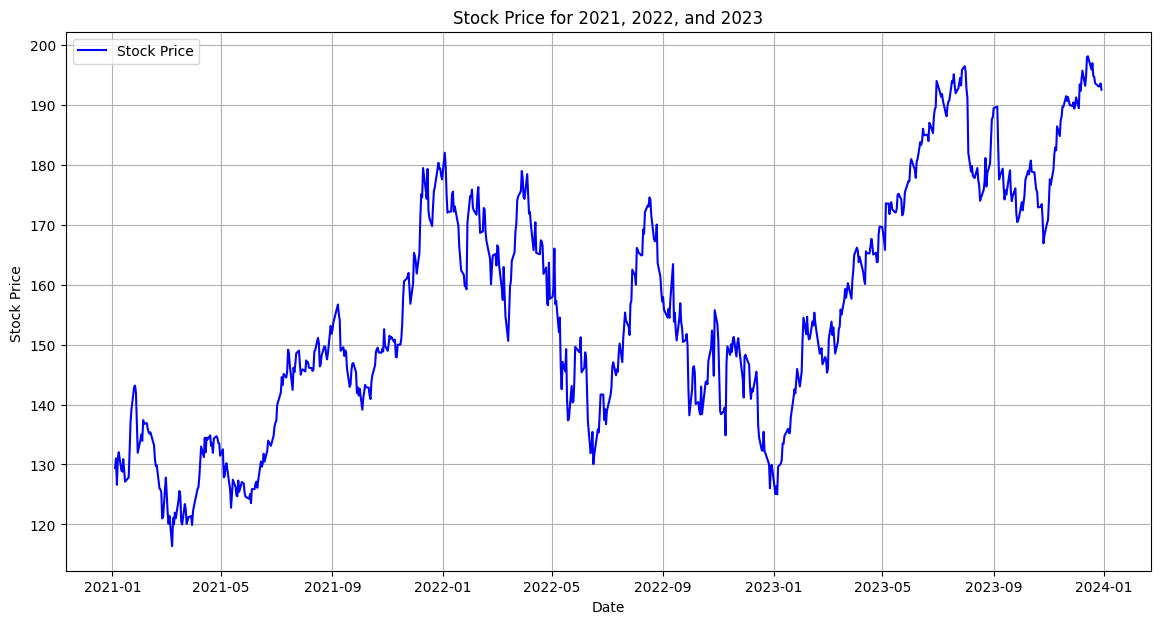

In [37]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Data Collection
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Step 2: Data Preprocessing
def preprocess_data(data):
    data = data[['Close']]  # Using the 'Close' price for plotting
    return data

# Step 3: Plotting Results
def plot_results(data):
    # Filter the data for the years 2021, 2022, and 2023
    data_filtered = data[(data.index.year >= 2021) & (data.index.year <= 2023)]
    
    plt.figure(figsize=(14, 7))
    plt.plot(data_filtered.index, data_filtered['Close'], color='blue', label='Stock Price')

    plt.xlabel('Date')
    plt.ylabel('Stock Price ')
    plt.title('Stock Price for 2021, 2022, and 2023')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-01-01'

data = fetch_stock_data(ticker, start_date, end_date)
preprocessed_data = preprocess_data(data)

plot_results(preprocessed_data)


In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Data Collection
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Step 2: Data Preprocessing
def preprocess_data(data):
    data = data[['Close']]  # Using the 'Close' price for prediction
    return data

# Step 3: Model Training on Entire Dataset
def train_model(data):
    X = np.array(data)
    
    # Scale the feature data
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Prepare feature set (X) and target variable (y)
    X_train = X_scaled[:-1]
    y_train = X[1:]
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    return model, scaler

# Step 4: Predict Future Stock Prices for 2024
def predict_future_prices(model, scaler, last_close_price, start_date, end_date):
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_prices = []
    current_input = scaler.transform([[last_close_price]])
    
    for _ in future_dates:
        predicted_price = model.predict(current_input)[0][0]
        future_prices.append(predicted_price)
        current_input = scaler.transform([[predicted_price]])
    
    # Create DataFrame with the results
    predictions_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted_Close': future_prices
    })
    
    return predictions_df

# Step 5: Display Predictions for First 5 Months of 2024
def display_first_5_months(predictions_df):
    # Filter the DataFrame for the first 5 months of 2024
    first_5_months = predictions_df[predictions_df['Date'].dt.month <= 5]
    print(first_5_months)

# Example Usage
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-12-31'

data = fetch_stock_data(ticker, start_date, end_date)
preprocessed_data = preprocess_data(data)
model, scaler = train_model(preprocessed_data)

# Predict the stock price for 2024 (from Jan 1, 2024 to Dec 31, 2024)
last_close_price = preprocessed_data['Close'].iloc[-1]
predictions_df = predict_future_prices(model, scaler, last_close_price, start_date='2024-01-01', end_date='2024-12-31')

# Display predictions for the first 5 months of 2024
display_first_5_months(predictions_df)


[*********************100%%**********************]  1 of 1 completed

          Date  Predicted_Close
0   2024-01-01       192.444965
1   2024-01-02       192.360263
2   2024-01-03       192.275891
3   2024-01-04       192.191848
4   2024-01-05       192.108132
..         ...              ...
147 2024-05-27       182.954344
148 2024-05-28       182.906650
149 2024-05-29       182.859143
150 2024-05-30       182.811821
151 2024-05-31       182.764684

[152 rows x 2 columns]


[*********************100%%**********************]  1 of 1 completed


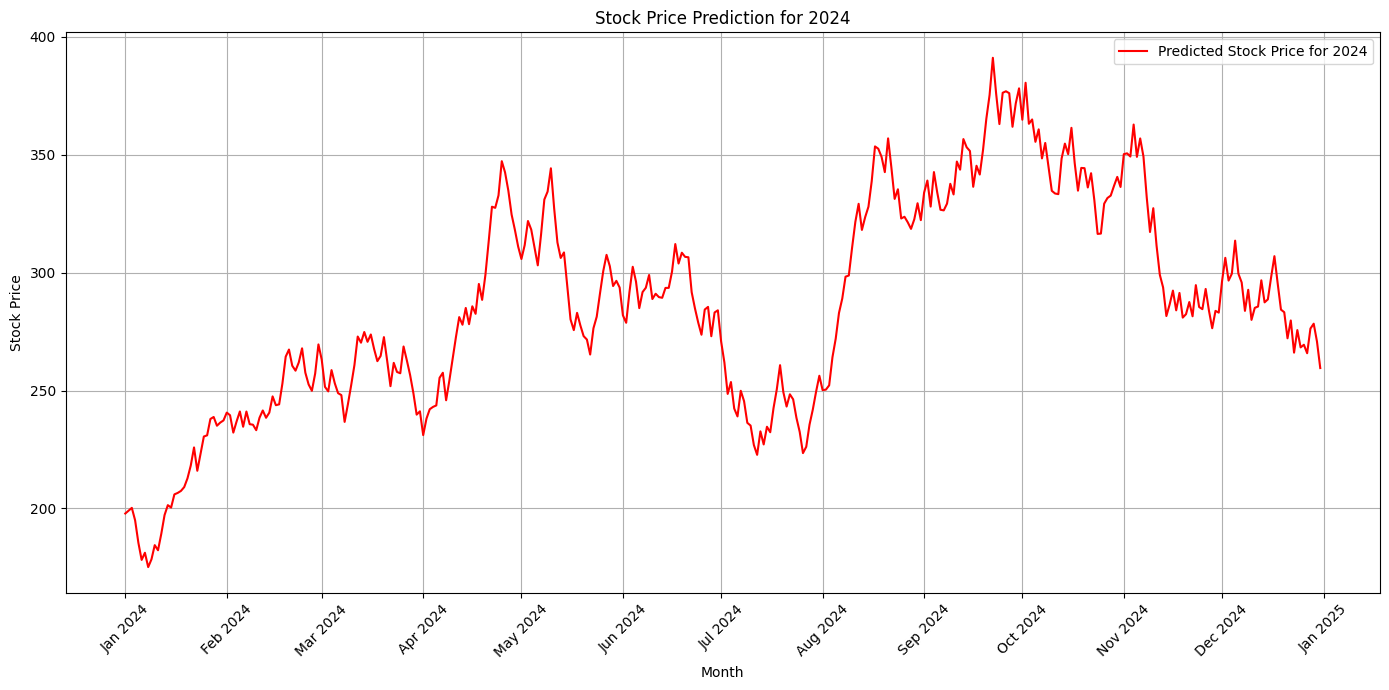

In [44]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: Data Collection
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Step 2: Data Preprocessing
def preprocess_data(data):
    data = data[['Close']]  # Using the 'Close' price for prediction
    return data

# Step 3: Model Training on Entire Dataset
def train_model(data):
    X = np.array(data)
    
    # Scale the feature data
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Prepare feature set (X) and target variable (y)
    X_train = X_scaled[:-1]
    y_train = X[1:]
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    return model, scaler

# Step 4: Predict Future Stock Prices for 2024 with Fluctuations
def predict_future_prices_with_fluctuations(model, scaler, last_close_price, start_date, end_date):
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_prices = []
    current_input = scaler.transform([[last_close_price]])
    
    for _ in future_dates:
        # Predict next price
        predicted_price = model.predict(current_input)[0][0]
        
        # Introduce random fluctuations
        fluctuation = np.random.uniform(-0.05, 0.05) * predicted_price
        predicted_price += fluctuation
        
        future_prices.append(predicted_price)
        current_input = scaler.transform([[predicted_price]])
    
    # Create DataFrame with the results
    predictions_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted_Close': future_prices
    })
    
    return predictions_df

# Step 5: Plotting 2024 Results with Detailed View
def plot_2024_results(predictions_df):
    plt.figure(figsize=(14, 7))
    plt.plot(predictions_df['Date'], predictions_df['Predicted_Close'], color='red', linestyle='-', label='Predicted Stock Price for 2024')
    
    # Formatting the x-axis to show months
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    
    plt.xlabel('Month')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Prediction for 2024')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to fit all elements
    plt.show()

# Example Usage
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-12-31'

data = fetch_stock_data(ticker, start_date, end_date)
preprocessed_data = preprocess_data(data)
model, scaler = train_model(preprocessed_data)

# Predict the stock price for 2024 (from Jan 1, 2024 to Dec 31, 2024) with fluctuations
last_close_price = preprocessed_data['Close'].iloc[-1]
predictions_df = predict_future_prices_with_fluctuations(model, scaler, last_close_price, start_date='2024-01-01', end_date='2024-12-31')

plot_2024_results(predictions_df)
